In [3]:
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the datasets
train_df = pd.read_csv('/content/Training Data.csv')
test_df = pd.read_csv('/content/Test Data.csv')

print("Training Dataset:\n", train_df.head())
print("Testing Dataset:\n", test_df.head())


Training Dataset:
    Id   income  age  experience  married house_ownership car_ownership  \
0   1  1303835   23           3   single          rented            no   
1   2  7574516   40          10   single          rented            no   
2   3  3991815   66           4  married          rented            no   
3   4  6256451   41           2   single          rented           yes   
4   5  5768871   47          11   single          rented            no   

            profession                 city           state  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh   
1   Software_Developer             Parbhani     Maharashtra   
2     Technical_writer            Alappuzha          Kerala   
3   Software_Developer          Bhubaneswar          Odisha   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   

   current_job_years  current_house_years  risk_flag  
0                  3                   13          0  
1                  9                   13      

In [5]:
train_df

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [6]:
# Check for missing values
print("Missing values in training set:\n", train_df.isnull().sum())
print("Missing values in testing set:\n", test_df.isnull().sum())

# Handling missing values by filling with mode or dropping
train_df = train_df.fillna(train_df.mode().iloc[0])
test_df = test_df.fillna(test_df.mode().iloc[0])

# Handling categorical features by one-hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Align the training and testing datasets (ensure both have the same columns)
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Check for duplicate rows
duplicate_count = train_df.duplicated().sum()
print(f"Number of duplicated rows in the training dataset: {duplicate_count}")

# Separating features and target
X = train_df.drop('risk_flag', axis=1)  # Replace 'risk_flag' with the actual target column name
y = train_df['risk_flag']  # Replace 'risk_flag' with the actual target column name

Missing values in training set:
 Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64
Missing values in testing set:
 id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
dtype: int64
Number of duplicated rows in the training dataset: 0


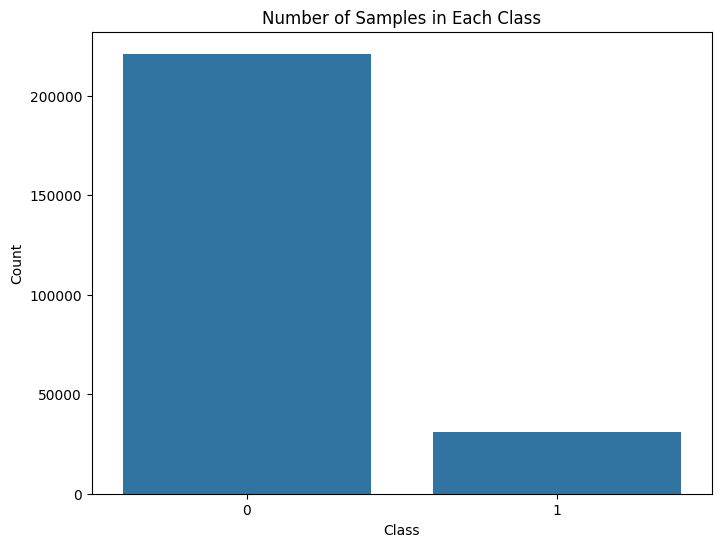

In [7]:
# Visualizing number of samples in each class
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Number of Samples in Each Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [8]:
# Display number of samples before oversampling
print("Number of samples before oversampling:")
print(y.value_counts())

Number of samples before oversampling:
risk_flag
0    221004
1     30996
Name: count, dtype: int64


<ipython-input-9-0b1db9e2060a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


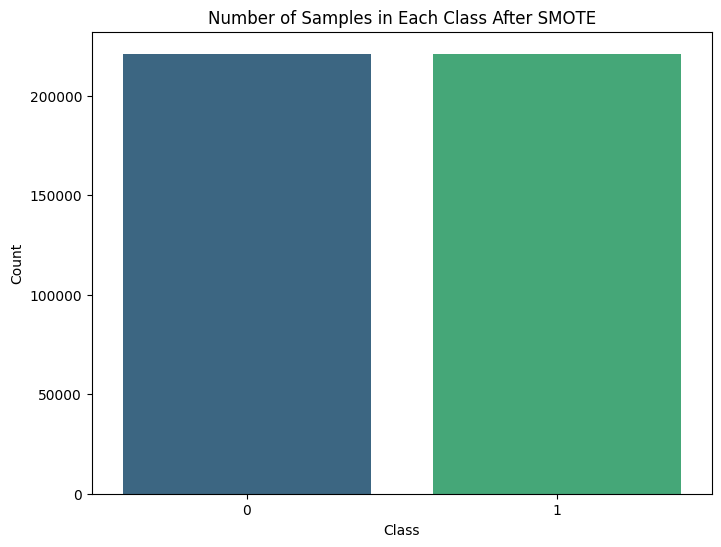

In [9]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualizing number of samples in each class after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='viridis')
plt.title("Number of Samples in Each Class After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [10]:
# Display number of samples after SMOTE
print("Number of samples after SMOTE:")
print(y_resampled.value_counts())

Number of samples after SMOTE:
risk_flag
0    221004
1    221004
Name: count, dtype: int64


In [11]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)



In [12]:

# Train a model for credit risk prediction
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [13]:
# Random Forest Model
print("\nRandom Forest Model")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))



Random Forest Model
Confusion Matrix:
[[63672  2847]
 [ 3879 62205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     66519
           1       0.96      0.94      0.95     66084

    accuracy                           0.95    132603
   macro avg       0.95      0.95      0.95    132603
weighted avg       0.95      0.95      0.95    132603


Accuracy Score: 0.9492771656749848
Precision: 0.9562350119904077
Recall: 0.9413019792990739
F1 Score: 0.9487097364568082


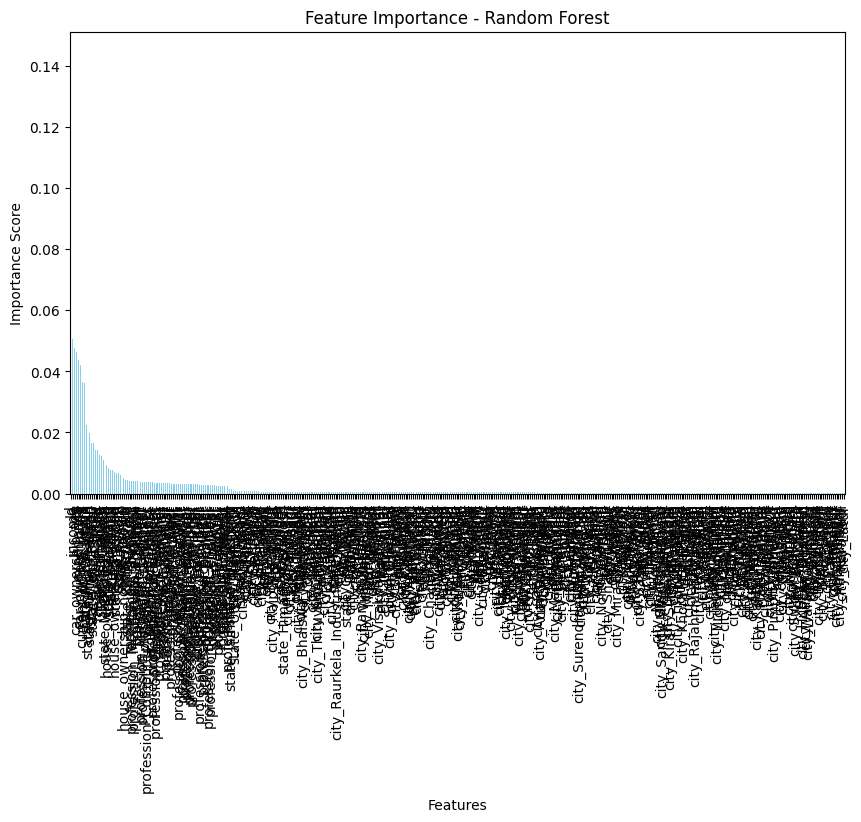

In [14]:
# Feature Importance for Random Forest
importances_rf = model_rf.feature_importances_
feature_names = X.columns
feature_importances_rf = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances_rf.plot(kind='bar', color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [15]:
# Decision Tree Model
print("\nDecision Tree Model")
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

# Gradient Boosting Model
print("\nGradient Boosting Model")
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))


Decision Tree Model
Confusion Matrix:
[[61278  5241]
 [ 3960 62124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     66519
           1       0.92      0.94      0.93     66084

    accuracy                           0.93    132603
   macro avg       0.93      0.93      0.93    132603
weighted avg       0.93      0.93      0.93    132603


Accuracy Score: 0.9306124295830411
Precision: 0.9221999554664886
Recall: 0.9400762665698202
F1 Score: 0.9310523121192366

Gradient Boosting Model
Confusion Matrix:
[[60990  5529]
 [18050 48034]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84     66519
           1       0.90      0.73      0.80     66084

    accuracy                           0.82    132603
   macro avg       0.83      0.82      0.82    132603
weighted avg       0.83      0.82      0.82    132603


Accuracy Score: 0.8221835101769

<ipython-input-16-1a8bcffed97d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='magma')


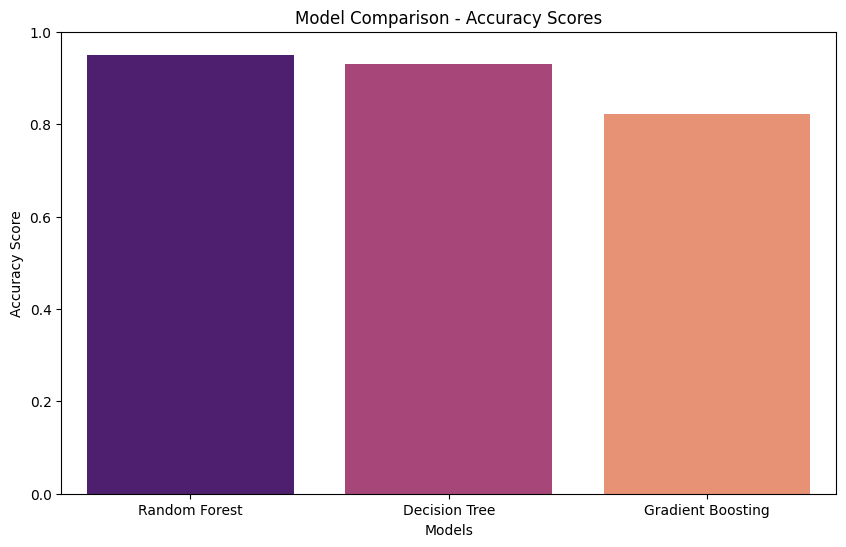

In [16]:
# Comparative Analysis of Models
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting']
accuracy_scores = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_gb)]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='magma')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay


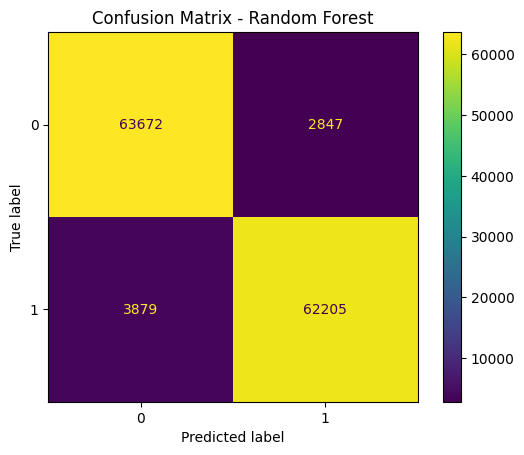

In [19]:
# Plot Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.show()

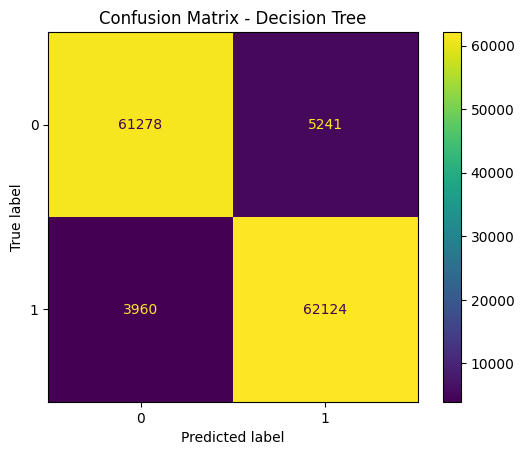

In [20]:
# Plot Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test)
plt.title('Confusion Matrix - Decision Tree')
plt.show()


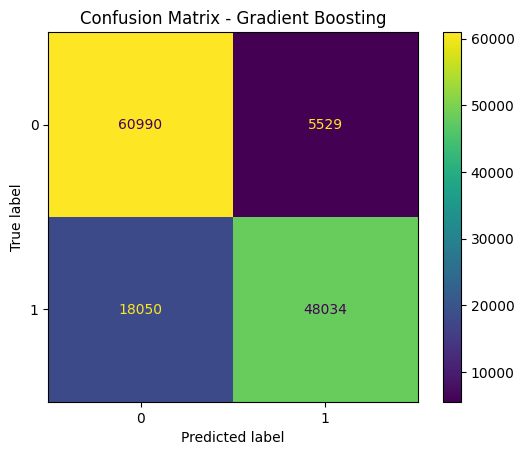

In [21]:
# Plot Confusion Matrix for Gradient Boosting
ConfusionMatrixDisplay.from_estimator(model_gb, X_test, y_test)
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

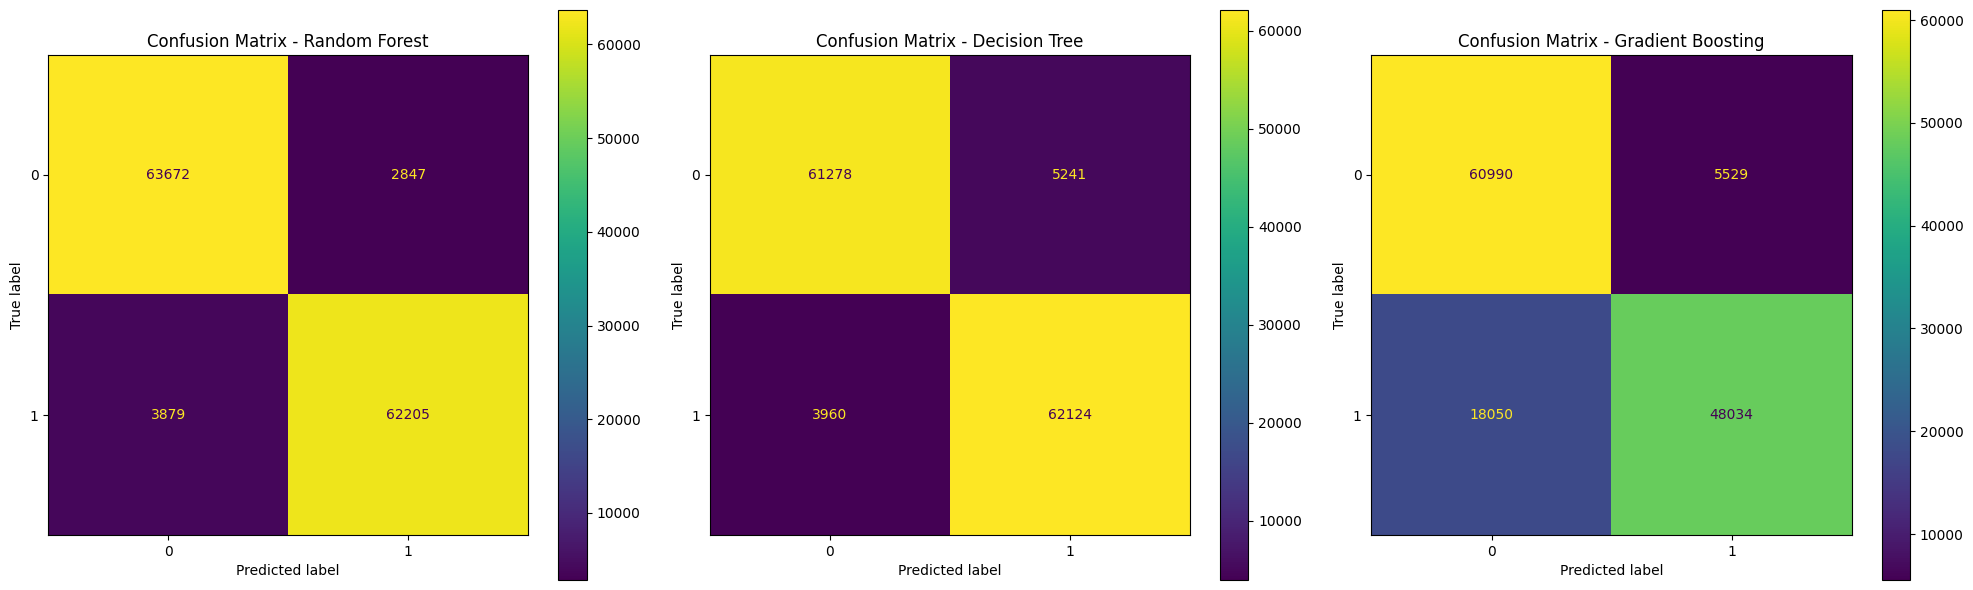

In [22]:
# Plot Confusion Matrices for All Models
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test, ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test, ax=axes[1])
axes[1].set_title('Confusion Matrix - Decision Tree')

# Gradient Boosting Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_gb, X_test, y_test, ax=axes[2])
axes[2].set_title('Confusion Matrix - Gradient Boosting')

plt.tight_layout()
plt.show()